In [1]:
import reactord as rd
import reactord.flowreactors.stationary_1d.pfr as pfr

import numpy as np

import matplotlib.pyplot as plt

In [2]:
def cpa(t, p):
    return np.full(len(t), 90)

def cpb(t, p):
    return np.full(len(t), 90)

def cpc(t,p):
    return np.full(len(t), 180)

def r_rate1(c, t, cons):
    k = 10 * np.exp(4000 * (1 / 300 - 1 / t))
    return k * c["a"]

def r_rate2(c, t, cons):
    k = 0.09 * np.exp(9000 * (1 / 300 - 1 / t)) / 1000
    return k * c["a"]**2

a = rd.Substance(
    "a", heat_capacity_gas=cpa)

b = rd.Substance(
    "b", heat_capacity_gas=cpb)

c = rd.Substance(
    "c", heat_capacity_gas=cpc)

mix = rd.mix.IdealGas([a, b, c])

kinetic = rd.Kinetic(
    mix=mix,
    reactions={
        "r1": {"eq": a > b, "rate": r_rate1, "DH": -20_000},
        "r2": {"eq": 2 * a > c, "rate": r_rate2, "DH": -60_000}
    },
    kinetic_constants={},
    rates_argument="concentration",
)

mb = pfr.mass_balances.MolarFlow(
    molar_flows_in={"a": 100, "b": 0, "c": 0},
)
eb = pfr.energy_balances.NoIsothermicAllConstant(
    temperature_in_or_out={"in": 150 + 273.15},
    refrigerant_in_temperature = 100 + 273.15,
    heat_exchange_coefficient=1128.3791670955125
)
pb = pfr.pressure_balances.Isobaric(351837.7787925)

area = 1

reactor = pfr.PFR(
    kinetic=kinetic,
    reactor_length=0.001,
    transversal_area=area,
    grid_size=10000,
    mass_balance=mb,
    energy_balance=eb,
    pressure_balance=pb,
)

reactor.simulate(method="RK45")

<Axes: xlabel='z'>

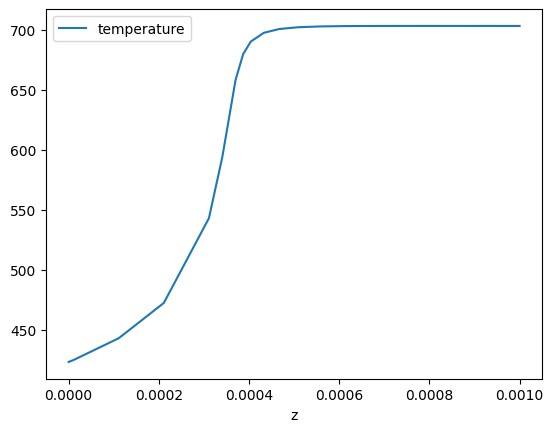

In [3]:
reactor.sim_df.plot("z", "temperature")

<Axes: xlabel='z'>

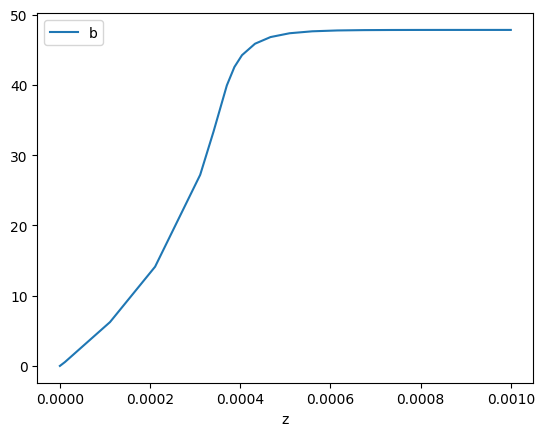

In [4]:
reactor.sim_df.plot("z", "b")